In [76]:
#Reading dataset
import pandas as pd
heart=pd.read_csv('heart.csv')

# EDA

In [77]:
heart.shape

(303, 14)

In [78]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [79]:
heart.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  3.0     145.0  233.0  1.0      0.0    150.0    0.0      2.3   
1  37.0  1.0  2.0     130.0  250.0  0.0      1.0    187.0    0.0      3.5   
2  41.0  0.0  1.0     130.0  204.0  0.0      0.0    172.0    0.0      1.4   
3  56.0  1.0  1.0     120.0  236.0  0.0      1.0    178.0    0.0      0.8   
4  57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   

   slope   ca  thal  target  
0    0.0  0.0   1.0     1.0  
1    0.0  0.0   2.0     1.0  
2    2.0  0.0   2.0     1.0  
3    2.0  0.0   2.0     1.0  
4    2.0  0.0   2.0     1.0

In [80]:
heart.tail()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
298  57.0  0.0  0.0     140.0  241.0  0.0      1.0    123.0    1.0      0.2   
299  45.0  1.0  3.0     110.0  264.0  0.0      1.0    132.0    0.0      1.2   
300  68.0  1.0  0.0     144.0  193.0  1.0      1.0    141.0    0.0      3.4   
301  57.0  1.0  0.0     130.0  131.0  0.0      1.0    115.0    1.0      1.2   
302  57.0  0.0  1.0     130.0  236.0  0.0      0.0    174.0    0.0      0.0   

     slope   ca  thal  target  
298    1.0  0.0   3.0     0.0  
299    1.0  0.0   3.0     0.0  
300    1.0  2.0   3.0     0.0  
301    1.0  1.0   3.0     0.0  
302    1.0  1.0   2.0     0.0

In [81]:
#checking null values
heart.isnull().values.any()

True

In [82]:
heart.isnull().sum()

age         1
sex         1
cp          1
trestbps    1
chol        1
fbs         5
restecg     1
thalach     1
exang       1
oldpeak     1
slope       1
ca          1
thal        1
target      1
dtype: int64

In [83]:
heart.isnull().sum().sum()

18

In [84]:
#replacing with 0 
heart.fillna(0,inplace=True)

In [85]:
heart.isnull().sum().sum()

0

In [86]:
heart.isnull().values.any()

False

In [87]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    float64
dtypes: float64(14)
memory usage: 33.3 KB


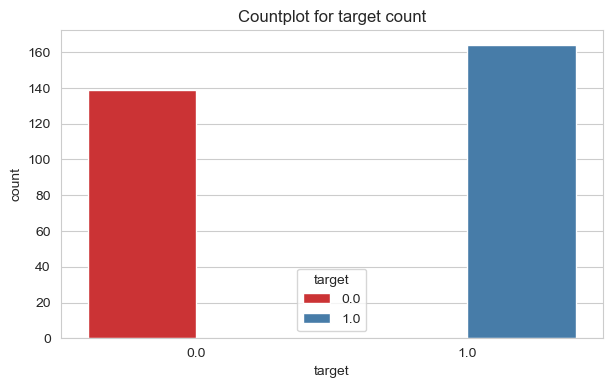

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
plt.title("Countplot for target count")
sns.countplot(x='target',data=heart, hue='target', palette='Set1')
plt.show()

In [89]:
print (" Total count of people having heartdisease(1) or no disease(0):")
heart['target'].value_counts()
#164 people has heart disease

 Total count of people having heartdisease(1) or no disease(0):


1.0    164
0.0    139
Name: target, dtype: int64

# outliers detection

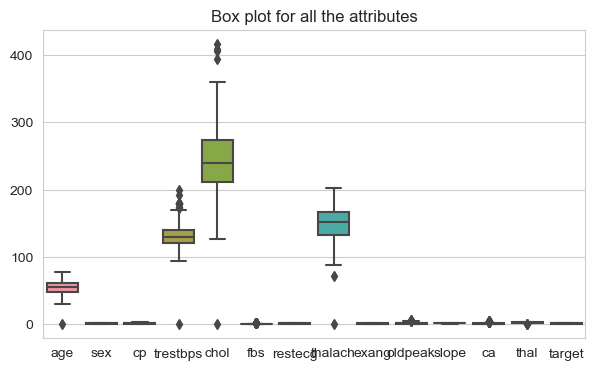

In [90]:
#boxplot for all the attribute

sns.set_style("whitegrid")
plt.figure(figsize=(7,4))
plt.title("Box plot for all the attributes")
sns.boxplot(data= heart)
plt.show()

<Axes: title={'center': 'Box plot for trestbps'}, xlabel='trestbps'>

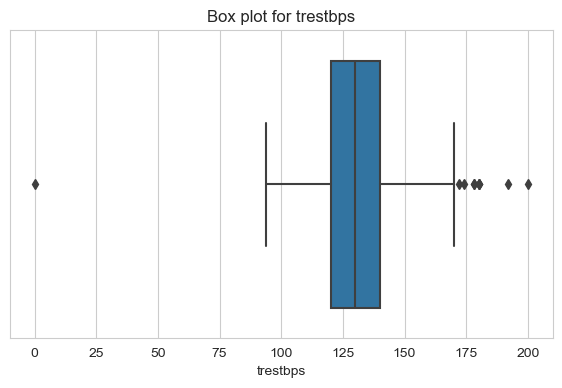

In [91]:
#boxplot for trestbps
plt.figure(figsize=(7,4))
plt.title("Box plot for trestbps")
sns.boxplot(x=heart['trestbps'])

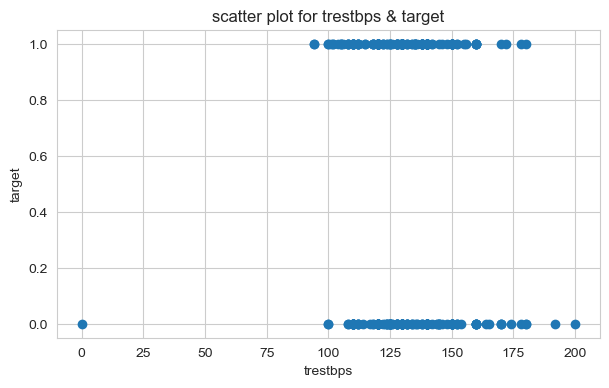

In [92]:
plt.figure(figsize=(7,4))
plt.title("scatter plot for trestbps & target")
plt.scatter(x=heart['trestbps'],y=heart['target'])
plt.xlabel("trestbps")
plt.ylabel("target")
plt.show()
#outiers is associated with the target 

<Axes: title={'center': 'Box plot for chol'}, xlabel='chol'>

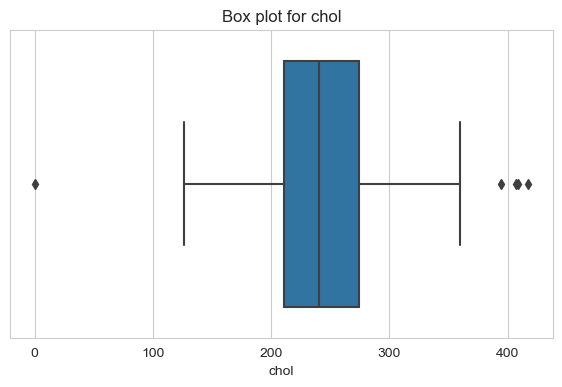

In [93]:

plt.figure(figsize=(7,4))
plt.title("Box plot for chol")
sns.boxplot(x=heart['chol'])

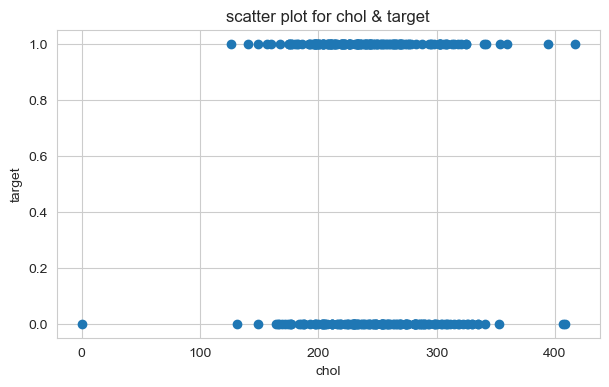

In [94]:
plt.figure(figsize=(7,4))
plt.title("scatter plot for chol & target")
plt.scatter(x=heart['chol'],y=heart['target'])
plt.xlabel("chol")
plt.ylabel("target")
plt.show()

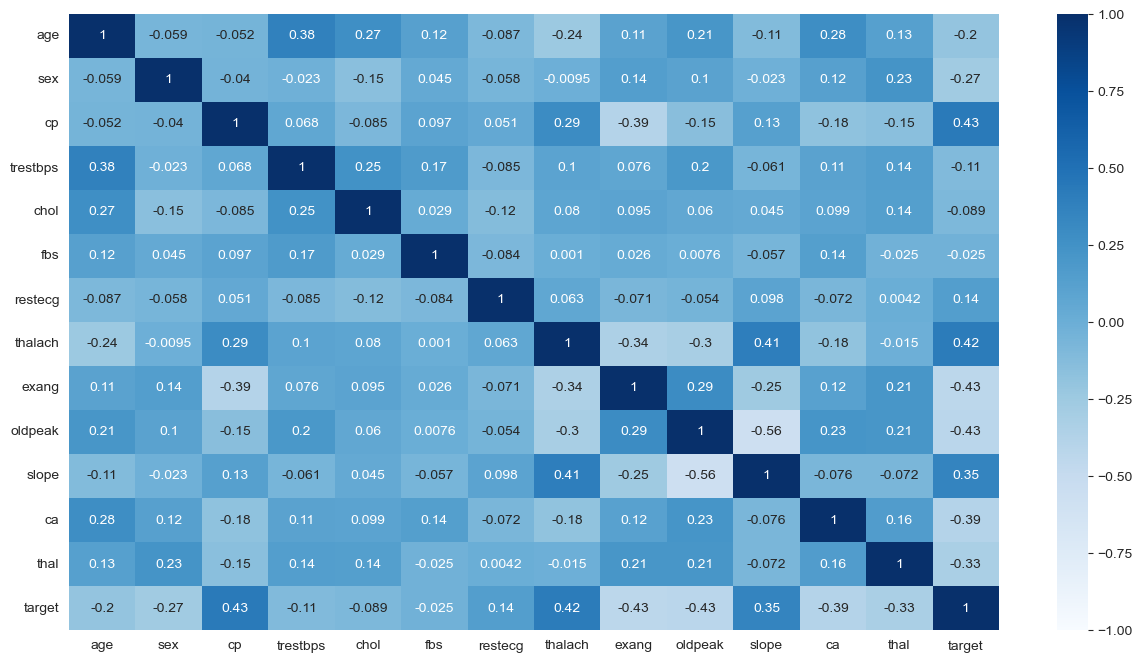

In [95]:
plt.figure(figsize=(15,8))
sns.heatmap(heart.corr(),center=0, cmap='Blues',vmin=-1, vmax=1, annot=True)
plt.show()
#Chol and Trestbps has negative correlation with target

In [96]:
# removing outliers using Zsocre 
import numpy as n
th = 2
mean = n.mean(heart['trestbps'])
std = n.std(heart['trestbps'])
z_score = (heart['trestbps'] - mean) / std
heart1= heart[z_score<=th]

print('Number of outliers removed:', len(heart) - len(heart1))
print('Outliers:', heart[z_score > th])


Number of outliers removed: 13
Outliers:       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
8    52.0  1.0  2.0     172.0  199.0  1.0      1.0    162.0    0.0      0.5   
101  59.0  1.0  3.0     178.0  270.0  0.0      0.0    145.0    0.0      4.2   
110  64.0  0.0  0.0     180.0  325.0  0.0      1.0    154.0    1.0      0.0   
152  64.0  1.0  3.0     170.0  227.0  0.0      0.0    155.0    0.0      0.6   
195  59.0  1.0  0.0     170.0  326.0  0.0      0.0    140.0    1.0      3.4   
203  68.0  1.0  2.0     180.0  274.0  1.0      0.0    150.0    1.0      1.6   
223  56.0  0.0  0.0     200.0  288.0  1.0      0.0    133.0    1.0      4.0   
228  59.0  1.0  3.0     170.0  288.0  0.0      0.0    159.0    0.0      0.2   
241  59.0  0.0  0.0     174.0  249.0  0.0      1.0    143.0    1.0      0.0   
248  54.0  1.0  1.0     192.0  283.0  0.0      0.0    195.0    0.0      0.0   
260  66.0  0.0  0.0     178.0  228.0  1.0      1.0    165.0    1.0      1.0   
266  55.0  

<Axes: title={'center': 'Box plot for trestbps after removing outliers'}, xlabel='trestbps'>

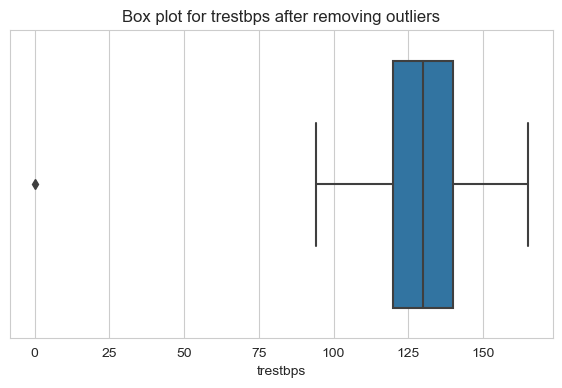

In [97]:
plt.figure(figsize=(7,4))
plt.title("Box plot for trestbps after removing outliers")
sns.boxplot(x=heart1['trestbps'])

In [98]:
import numpy as n
th = 2
mean = n.mean(heart['chol'])
std = n.std(heart['chol'])
z_score = (heart['chol'] - mean) / std
heart1= heart[z_score<=th]

print('Number of outliers removed:', len(heart) - len(heart1))
print('Outliers:', heart[z_score > th])

Number of outliers removed: 7
Outliers:       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
4    57.0  0.0  0.0     120.0  354.0  0.0      1.0    163.0    1.0      0.6   
28   65.0  0.0  2.0     140.0  417.0  1.0      0.0    157.0    0.0      0.8   
39   65.0  0.0  2.0     160.0  360.0  0.0      0.0    151.0    0.0      0.8   
96   62.0  0.0  0.0     140.0  394.0  0.0      0.0    157.0    0.0      1.2   
180  55.0  1.0  0.0     132.0  353.0  0.0      1.0    132.0    1.0      1.2   
220  63.0  0.0  0.0     150.0  407.0  0.0      0.0    154.0    0.0      4.0   
246  56.0  0.0  0.0     134.0  409.0  0.0      0.0    150.0    1.0      1.9   

     slope   ca  thal  target  
4      2.0  0.0   2.0     1.0  
28     2.0  1.0   2.0     1.0  
39     2.0  0.0   2.0     1.0  
96     1.0  0.0   2.0     1.0  
180    1.0  1.0   3.0     0.0  
220    1.0  3.0   3.0     0.0  
246    1.0  2.0   3.0     0.0  


<Axes: title={'center': 'Box plot for chol after removing outliers'}, xlabel='chol'>

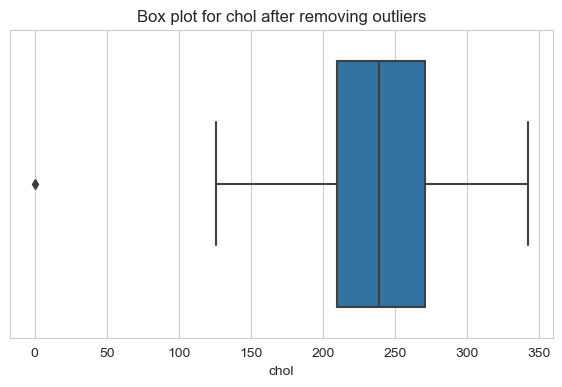

In [99]:
#boxplot for chol- after removing outliers
plt.figure(figsize=(7,4))
plt.title("Box plot for chol after removing outliers")
sns.boxplot(x=heart1['chol'])

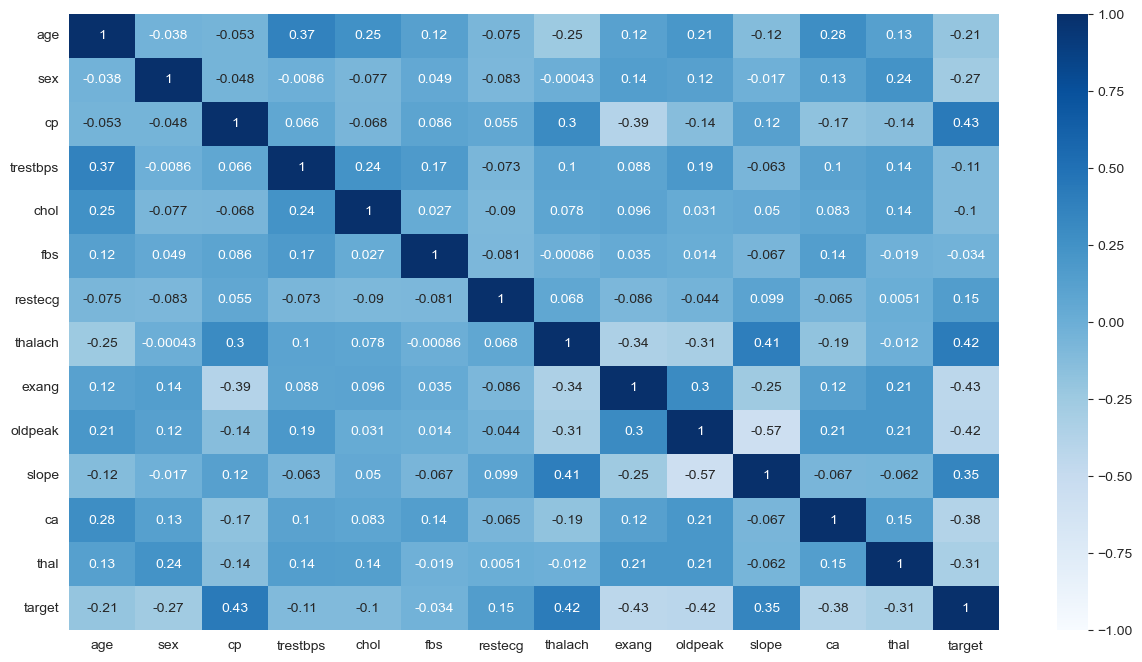

In [100]:
#correlation after outlier removal
plt.figure(figsize=(15,8))
sns.heatmap(heart1.corr(),center=0, cmap='Blues',vmin=-1, vmax=1, annot=True)
plt.show()

In [102]:
heart1.shape

(296, 14)

# Splitting the dataset

In [103]:
from sklearn.model_selection import train_test_split
y=heart1['target']
x=heart1.drop('target',axis=1)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [123]:
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (236, 13)
X_test: (60, 13)
Y_train: (236,)
Y_test: (60,)
